In [1]:
from pytrends.request import TrendReq


import csv
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

In [2]:
def cleanup(df):
    df['International_Womens_Day']=df['International_Womens_Day'].replace("<1","0.5")
    df['International_Mens_Day']=df['International_Mens_Day'].replace("<1","0.5")
    return(df)

def convert_to_int(df,cols_to_convert):
    for column in cols_to_convert:
        df[column]=df[column].astype(float)
    return(df)

In [3]:
searchResults=pd.read_csv('MenVsWomenDaySearches.csv')

In [4]:
searchResults=cleanup(searchResults)

In [17]:

cols_to_convert=['International_Womens_Day','International_Mens_Day']
searchResults=convert_to_int(searchResults,cols_to_convert)
df1=df2=searchResults[searchResults.index >100]

In [18]:
df1.head()

,Month,International_Womens_Day,International_Mens_Day
101,2012-06,0.5,1.0
102,2012-07,0.5,5.0
103,2012-08,0.5,0.5
104,2012-09,0.5,1.0
105,2012-10,0.5,1.0


C:\Users\sphulse\Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


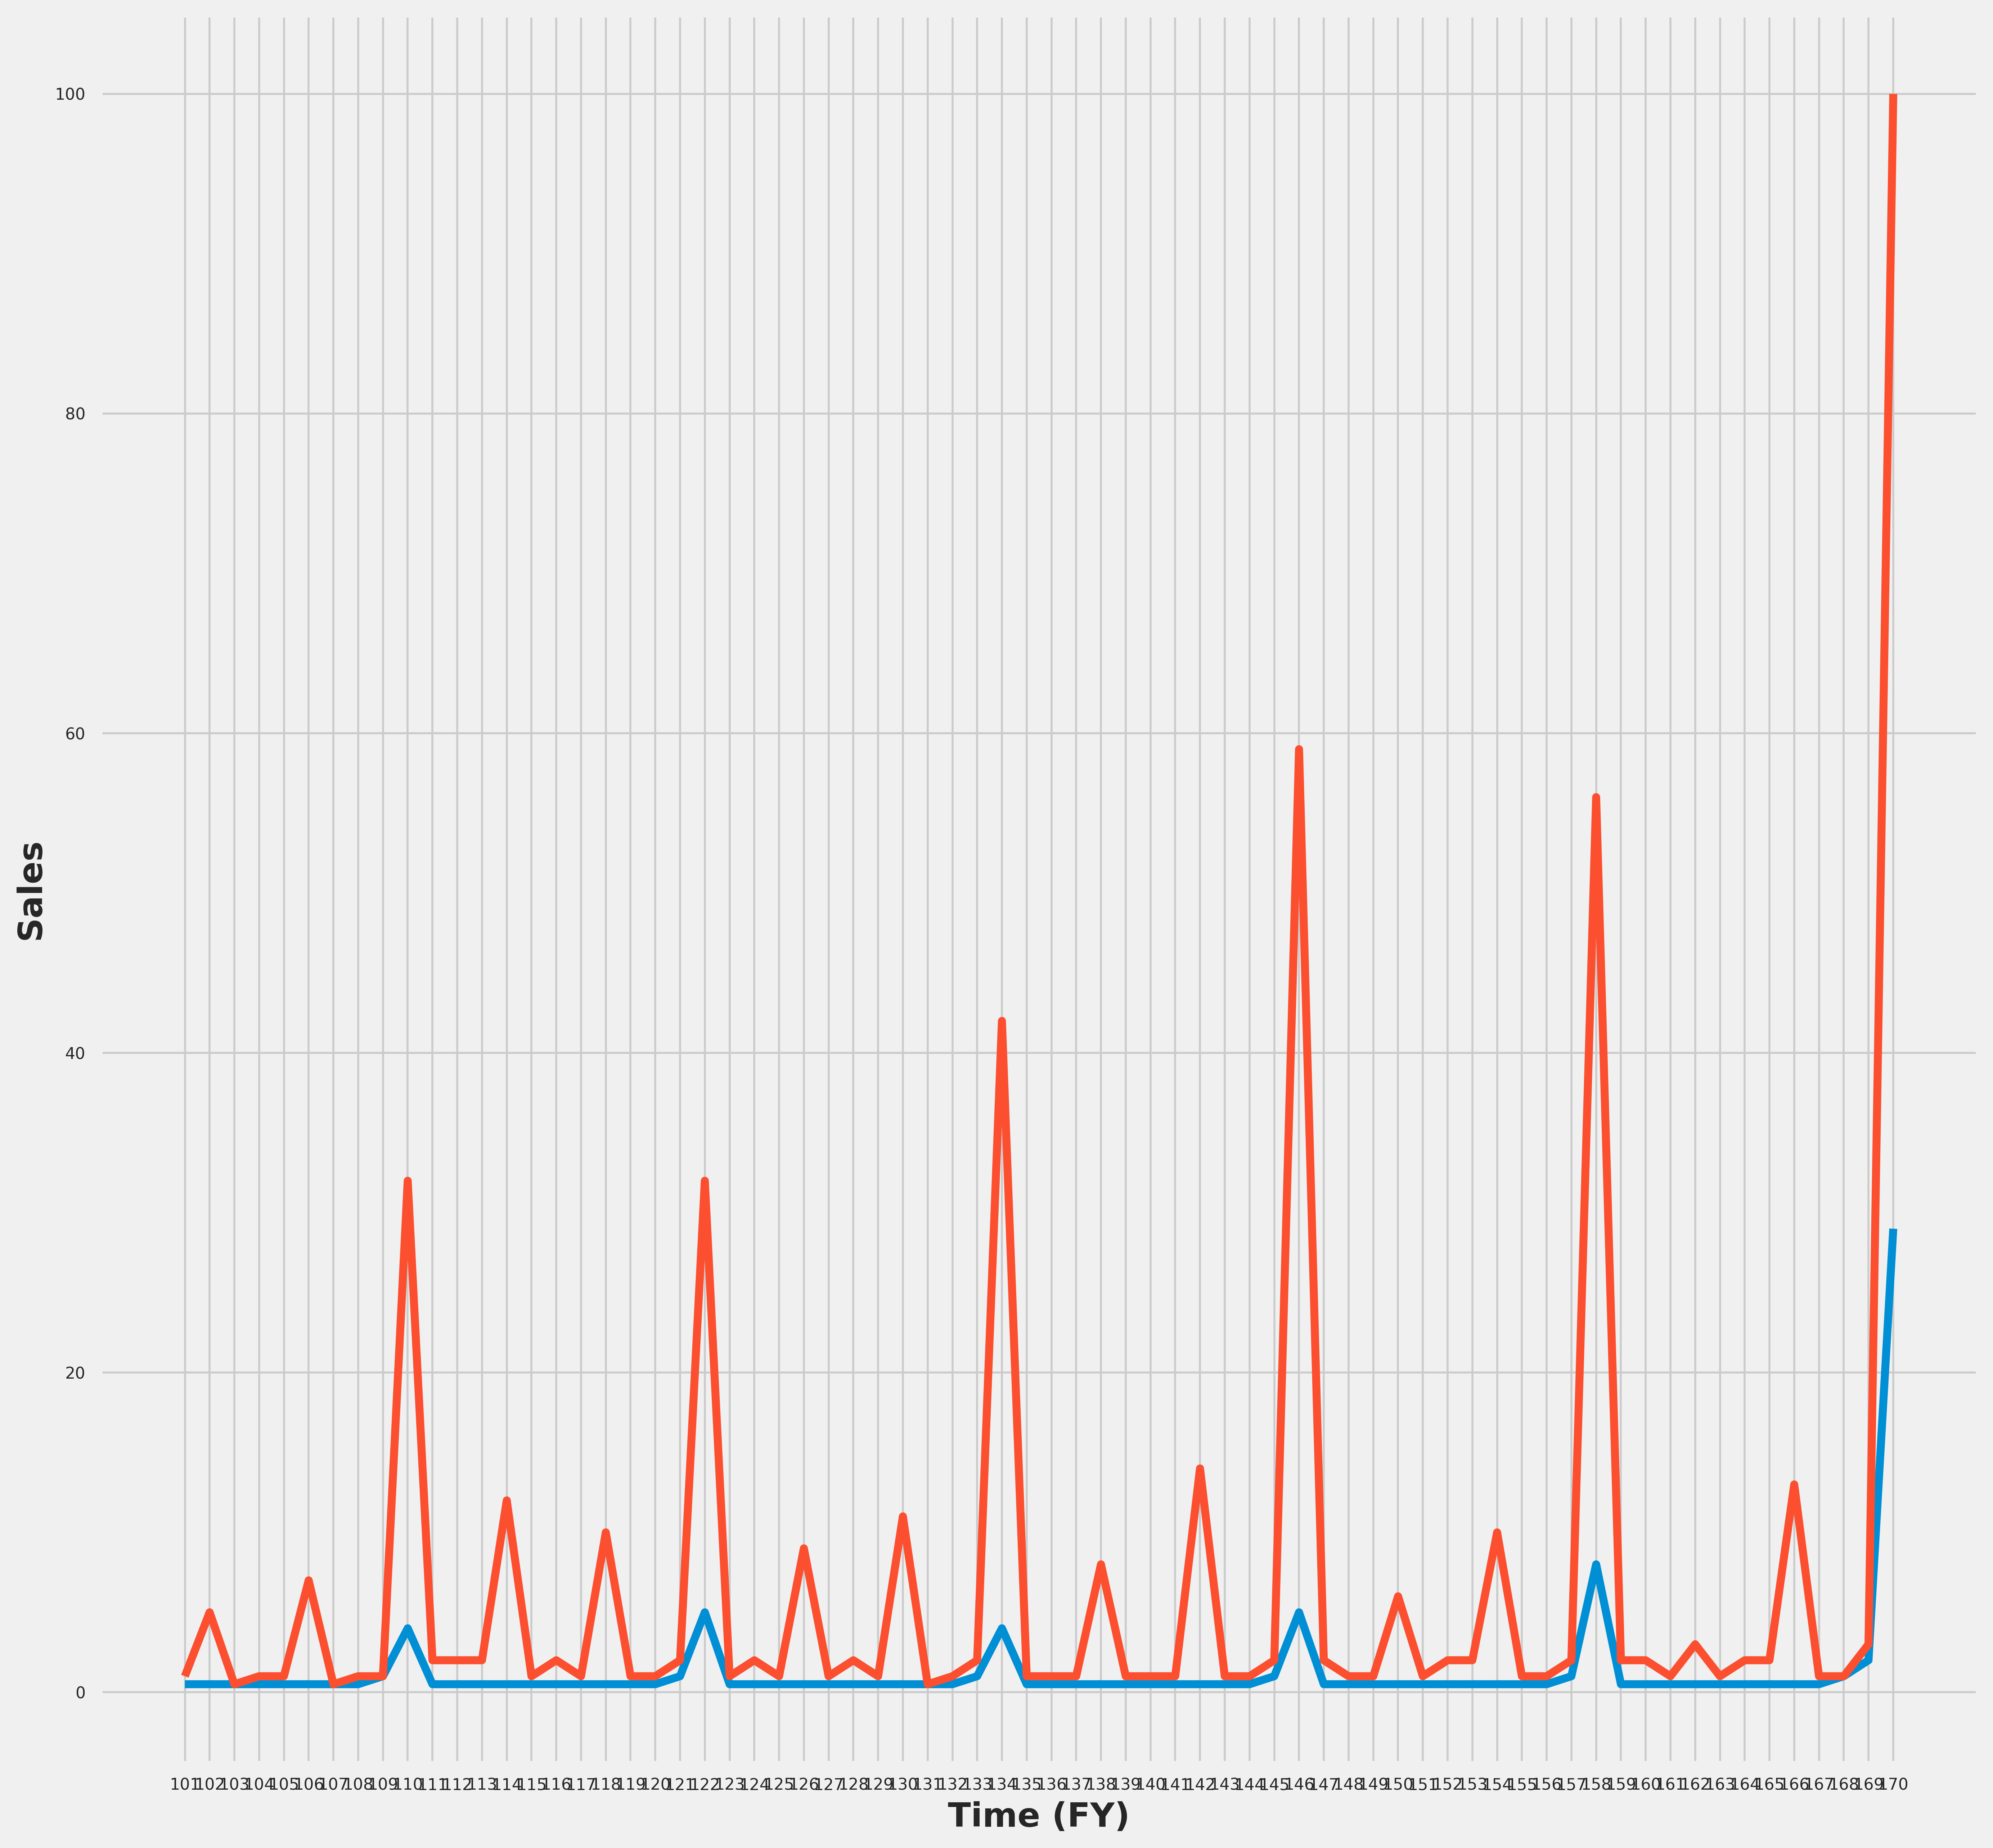

In [19]:
plt.style.use('fivethirtyeight')
'''
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Set an aspect ratio
'''

fig = plt.figure(figsize=(15,15), dpi=400)

plt.xticks(df1.index)
plt.xlabel('Time (FY)')
plt.ylabel('Sales')


plt.plot(df1.index, df1.International_Womens_Day)
plt.plot(df2.index, df2.International_Mens_Day)
plt.show()

In [6]:

searchResults = searchResults.melt('Month', var_name='Celebration_Day',  value_name='Relative_Number_Of_Results')


In [7]:
searchResults['Month']=pd.to_datetime(searchResults['Month'])

In [8]:
searchResults['Month_Year']=searchResults['Month'].apply(lambda x: x.strftime('%B-%Y'))

In [9]:
searchResults.head()

,Month,Celebration_Day,Relative_Number_Of_Results,Month_Year
0,2004-01-01,International_Womens_Day,0.5,January-2004
1,2004-02-01,International_Womens_Day,1.0,February-2004
2,2004-03-01,International_Womens_Day,2.0,March-2004
3,2004-04-01,International_Womens_Day,0.0,April-2004
4,2004-05-01,International_Womens_Day,0.0,May-2004


In [12]:
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
df=searchResults 
# multiple line plot
for column in df.drop('Month', axis=1):
   plt.plot(df['Month'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)


AttributeError: 'Series' object has no attribute 'find'

In [ ]:
for column in df.drop('Month', axis=1):
   plt.plot(df['Month'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

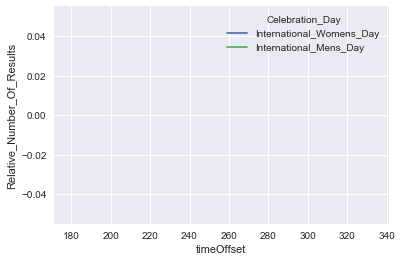

In [17]:
#df['date_column'] = pd.to_datetime(df['date_column'])



searchResults['timeOffset']=searchResults.index

sns.tsplot(data=searchResults, time='timeOffset',
           condition="Celebration_Day", value="Relative_Number_Of_Results")

In [18]:
#TODO
#pytrends
searchResults.head()

,Month,Celebration_Day,Relative_Number_Of_Results,Month_Year,timeOffset
0,2004-01-01,International_Womens_Day,0.5,January-2004,0
1,2004-02-01,International_Womens_Day,1.0,February-2004,1
2,2004-03-01,International_Womens_Day,2.0,March-2004,2
3,2004-04-01,International_Womens_Day,0.0,April-2004,3
4,2004-05-01,International_Womens_Day,0.0,May-2004,4
